# Introduction: Machine Learning Project Part 1
출처: https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420
https://github.com/WillKoehrsen/machine-learning-project-walkthrough

##Mission:

__빌딩 에너지 데이터를 이용하여 빌딩의 energy star score를 추정하는 모델을 만들고, 분석을 통해 score를 추정하는데 중요한 입력값을 찾아본다.__

타겟값(score)을 포함한 데이터를 이용하여 regression 모델을 학습한다. 

* Supervised problem: 입력 feature와 타겟값(정답)이 주어져있다.
* Regression problem: 출력 타겟값이 0과 100 사이의 continous값이다.

학습과정에서 모델에게 입력 feature와 정답 타겟값을 주어 모델이 feature와 타겟값의 관계를 학습하도록 한다. 테스트 과정에서는 학습과정에서 사용하지 않은 데이터를 이용하여 모델이 얼마나 잘 학습하였는지를 평가한다. 

## Machine Learning Workflow

**1. Data cleaning and formatting**
**2. Exploratory data analysis**
**3. Feature engineering and selection**
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Draw conclusions and write a well-documented report

이상의 과정은 반복적으로 수행되며 순차적으로 진행되지 않을 수 있다. 예를 들어, 모델링하기 전에 feature selection을 수행하지만, 모델링의 결과를 이용하여 다시 feature selection을 수행할 수도 있다. 일반적으로 다음 단계로 넘어가기 전에 한 단계를 완료해야 하지만, 한 단계를 처음 마치더라도 다시 돌아가서 개선할 수 있다. 

## 사용하는 패키지들
 
`numpy`, `pandas`, `scikit-learn`, `matplotlib`, `seaborn`

In [1]:
#1
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24 #rc: runtime configuration

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting

## Load in the Data and Examine

데이터를 읽어 판다스 데이터프레임으로 저장하자.

뉴욕시 부동산 소유자는 매년 에너지 및 물 소비량을 벤치마킹하여 빌딩 에너지 효율 등급 라벨을 획득하여 표시해야 한다. (병원, 호텔, 수퍼마켓, 학교, 사무실 등)
https://www1.nyc.gov/site/buildings/codes/compliance-instructions.page

<img src="https://drive.google.com/uc?export=view&id=1K2TKdIfJOBrpYoha0YGD_pyqe0AdbzF2" width="600">


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/파이썬코드/Energy score 예측 (1)"

/content/drive/MyDrive/파이썬코드/Energy score 예측 (1)


In [5]:
#2
# Read in data into a dataframe 
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Display top of dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

###Raw data 들여다보기


60개의 column 중 알 수 없는 항목들이 많다. Column 이름으로부터 데이터 속성을 파악하거나 인터넷 검색을 통해 의미를 파악할 수도 있다 (예, BBL: 뉴욕시의 각 부동산 단위를 식별하는 데 사용되는 소포 번호 시스템). 사실 머신러닝에서는 입력 데이터의 속성을 반드시 알아야 하는 것은 아니다. 모델을 통해서 어떤 입력 feature가 중요한지 알아낼 수 있다. 아래 링크에 있는 pdf파일에 모든 feature에 대한 설명이 있긴 하다.
http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf

`score`값:각 타입의 건물에 대한 에너지 사용량 백분율 순위(100이 가장 좋은 것임)

btu: 영국 열량 단위(British thermal unit, Btu, BTU)는 1파운드의 물을 화씨 1도(1°F) 올리는 데 필요한 열량

## Data Types and Missing Values

판다스 데이터프레임의 `info` method를 이용하여 각 column의 데이터 타입과 non-missing value의 개수를 알아낼 수 있다. 그러나 이미 데이터프레임에 "Not Available" 라고 표시된 것들은 missing value로 분류되지 않았지만 실제로 데이터가 없는 것들이다. Column에 있는 값들 중 하나라도 숫자가 아니면 숫자 타입으로 저장되지 않는 문제가 있다.

In [6]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### Convert Data to Correct Types

많은 데이터들의 데이터타입이 `object`인 것을 확인할 수 있다. 이중 `float`로 바꾸어야 할 것들이 다수 있다.

"Not Available"로 표현된 것을 `np.nan`(float 타입)로 바꾸자.

In [ ]:
#3
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns): #column label에서 숫자타입으로 바꿔주어야 할 것들
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [ ]:
# Statistics for each column
# 숫자타입 column에 대해서만 통계정보를 보여준다.
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

## Missing Values

데이터 분석의 시작: 각 column에서 missing value의 비율을 살펴보자. 아래의 함수는 missing value의 개수와 백분율을 계산해준다.

[Stack Overflow forum](https://stackoverflow.com/a/39734251) 

In [ ]:
#4
# Function to calculate missing values by column
# 이대로 사용해도 괜찮으나 관심있으면 자세히 들여다보자.
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [ ]:
data.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

Missing value 비율이 너무 높으면 제외하는게 좋다.

Missing value의 비율이 어느 정도일 때 제외하는지에 대해서는 정해진 기준이 없다 ([here is a discussion](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456)).

본 프로젝트에서는 50%를 기준으로 하자.

In [ ]:
#5
# Get the columns with > 50% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [ ]:
missing_columns

['Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)']

In [ ]:
#6
# Drop the columns
# del 명령어를 사용해도 되지만 한꺼번에 여러 개의 column을 제거하기 위해 drop 함수를 사용한다.
data = data.drop(columns = list(missing_columns))

In [ ]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


머신러닝 모델링을 하기 전에 missing value들은 적절값로 대체되어야 한다.

# Exploratory Data Analysis

[Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)는 데이터 탐색을 위해 그래프를 그리고 통계값을 계산하는 과정을 말한다. 이러한 과정을 통해 이상치(anomaly), 패턴, 경향성, 관계 등을 파악할 수 있다. EDA 과정을 통해 feature들 간의 상관관계를 찾아내는 등 그 자체로도 흥미롭지만 어떤 feature를 사용할지를 결정하는 수단이 될 수도 있다. 일반적으로 EDA는 high-level overview부터 시작하여 데이터의 특정 부분을 들여다보는 순서로 진행하게 된다.

먼저 'Energy Star Score'부터 들여다보기로 하자.

## Single Variable Plots

Histogram을 그려서 분포를 가늠할 수 있다.

먼저 Energy Star Score 분포를 살펴보자.

plt.style.use(): [matplotlib style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

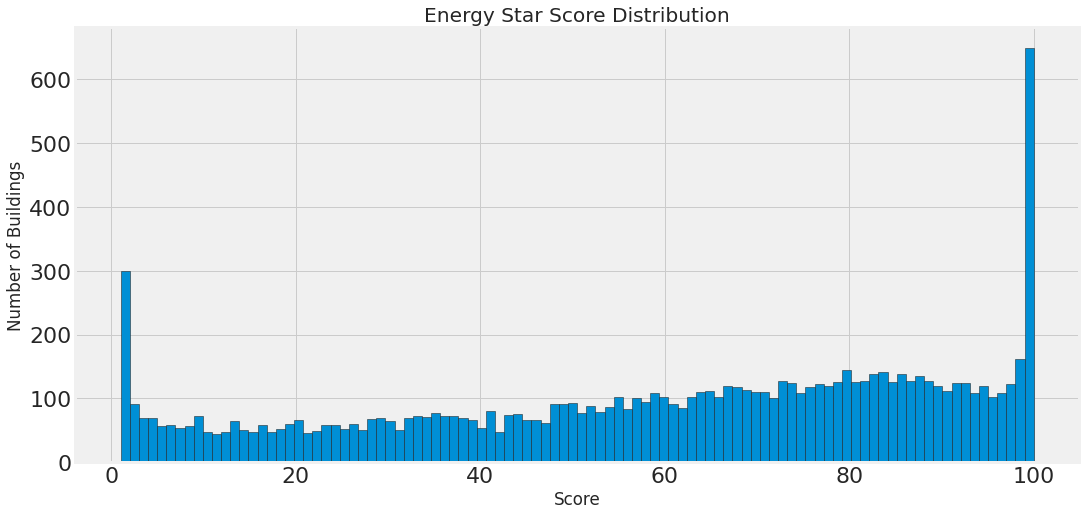

In [ ]:
#7
#figsize(8, 8)
plt.figure(figsize=(18,8))
# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'}) # 간단하게 하기 위해 rename

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

1과 100이 많이 나타나는데 이것은 Energy Star Score가 건물주가 보고한 에너지 사용량(self-reported energy usage)을 바탕으로 정해지기 때문인 것으로 추정된다.

## EUI

다음으로 EUI 분포를 살펴보자.

Energy Use Intensity (EUI)는 단위면적당 에너지 사용량을 나타낸다.

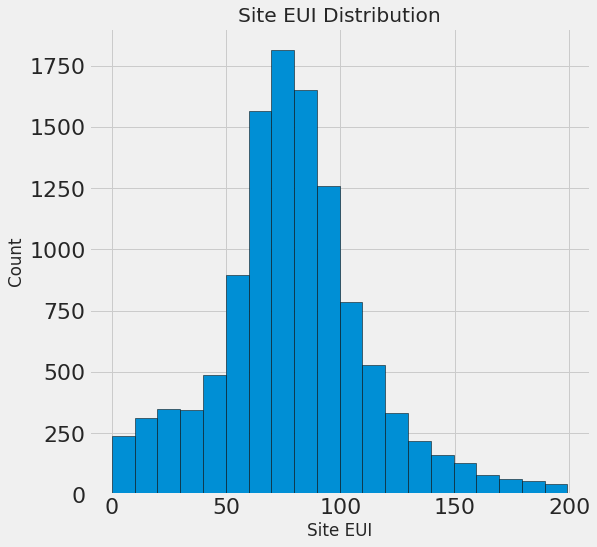

In [ ]:
#8
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

위의 histogram에서 EUI가 0에서부터 800000까지 표시되어 있는데 0근처만 분포가 보인다. 이러한 왜곡된 histogram은 'outlier'때문에 발생한다. 왜곡된 histogram을 해결하기 위해 데이터를 좀더 들여다보자.

describe함수를 이용해 기본적인 통계값을 확인한다.

In [ ]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

`data['Site EUI (kBtu/ft²)']`는 데이터프레임에서 하나의 열을 나타내며 이것은 pandas Series이다.

In [ ]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(50)

2069        929.0
2514        930.7
171         992.6
4046       1000.6
8924       1005.1
11504      1029.7
8          1138.3
5801       1145.6
10175      2001.8
541        2025.2
9057       2564.4
1589       3576.6
3532       3995.4
62         4377.4
3100       4651.5
2367       4770.0
3636       5972.3
3332       8084.2
3306       8311.8
123        9915.6
7593      12316.2
3665      13145.4
2303      14195.9
11186     15059.3
11189     16519.6
1256      17133.2
564       17193.4
2251      18235.7
546       18368.1
10710     18459.5
1276      19313.5
3163      22259.0
1595      24541.2
6885      25789.4
2155      26451.7
3265      28373.6
847       34326.8
3373      49340.7
3139      50621.6
2262      50823.6
3173      51328.8
3170      51831.2
3383      78360.1
8269      84969.6
3263      95560.2
8268     103562.7
8174     112173.6
3898     126307.4
7        143974.4
8068     869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

`data['Site EUI (kBtu/ft²)'].dropna()`는 NaN을 제거한 Series 객체이다.

[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html)

[dropna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dropna.html)

describe함수를 이용하여 max가 median과 많이 떨어져 있음을 확인했고, sort_values함수를 통해 하나의 특이한 값(outlier)를 발견했다.

{'boxes': [<matplotlib.lines.Line2D at 0x7f6d022ca090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6d022d20d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d022d9110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d022d2b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6d022ca610>,
  <matplotlib.lines.Line2D at 0x7f6d022cab50>]}

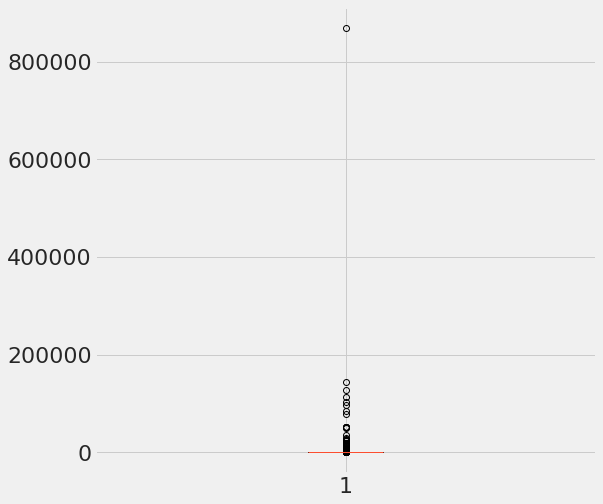

In [ ]:
plt.boxplot(data['Site EUI (kBtu/ft²)'].dropna())

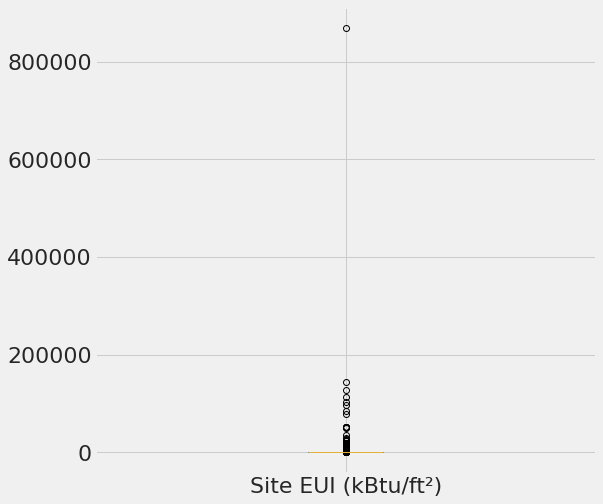

In [ ]:
data['Site EUI (kBtu/ft²)'].dropna().plot.box()

In [ ]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [ ]:
data.iloc[8068]

Order                                                                                                      9984
Property Id                                                                                             4414323
Property Name                                                                                      234 Skillman
Parent Property Id                                                          Not Applicable: Standalone Property
Parent Property Name                                                        Not Applicable: Standalone Property
BBL - 10 digits                                                                                      3028937502
NYC Borough, Block and Lot (BBL) self-reported                                                       3028937502
NYC Building Identification Number (BIN)                                                      3390250 , 3338313
Address 1 (self-reported)                                                                   234 Skillman

Outlier는 다음과 같은 여러 가지 이유로 발생할 수 있다.
>  typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values

Outlier는 데이터의 분포를 왜곡시키므로 제거해야 할 대상이다.


### Removing Outliers

단지 값이 이상해보인다고 제거해서는 안된다. 가능한한 보수적으로 접근해야 한다.

Quartile(사분위수)
* 1st quartile(Q1): 25%에 해당하는 값
* 2nd quartile(Q2): median과 동일
* 3rd quartile(Q3): 75%에 해당하는 값
* interquartile range(IQR): Q3-Q1

Extreme outlier:   x < Q1 - 3 * IQR  or x > Q3 + 3 * IQR


In [ ]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [ ]:
#9
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

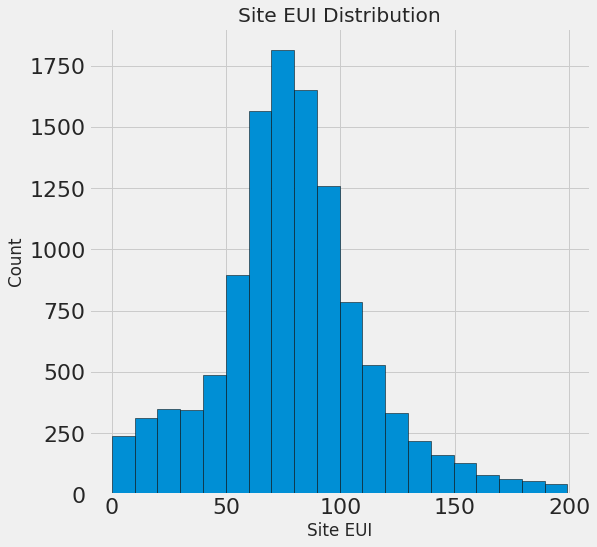

In [ ]:
#10
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

Outlier를 제거하고나니 이제 정상적인 분포로 보여진다.

위와 같이 outlier를 제거했으니 분석을 이어가도록 한다.

## Looking for Relationships

Density plot은 히스토그램을 smoothing한 것으로 생각하면 된다.

Property type에 따른 score 분포를 그려보자.

너무 type이 많으면 한꺼번에 나타내기 어려우니 데이터에서 100번 이상 나타나는 building types에 대해서만 그려보기로 한다.

In [ ]:
#11
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

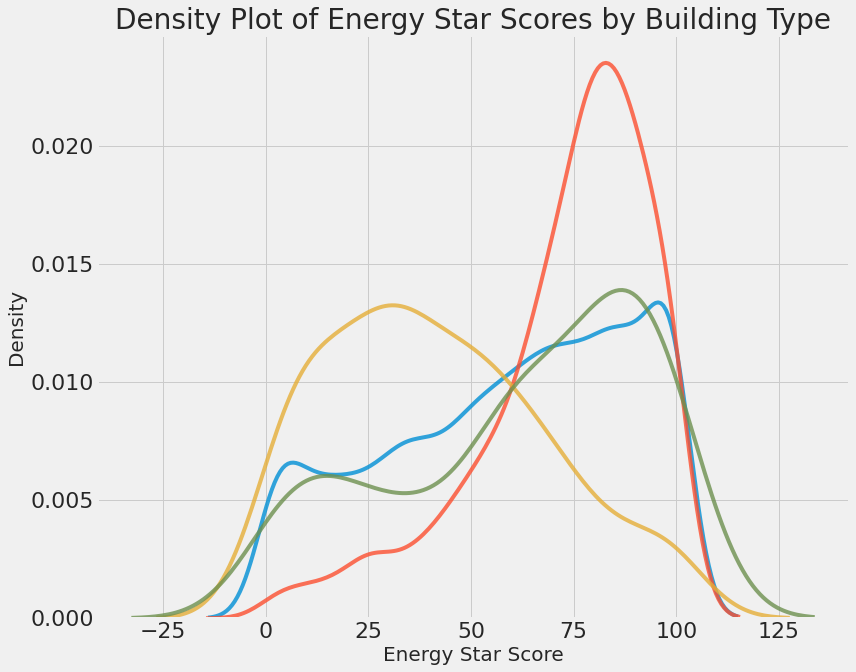

In [ ]:
#12
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

0보다 작은 score는 나타날 수 없는데, 분포를 smoothing하는 과정에서 발생하였다.

Building type에 따라 다른 score분포가 나타나므로 building type은 score에 영향을 미치는 요소라고 볼 수 있다.

그런데 building type은 범주형(categorical) 데이터이고 문자열로 나타나있으므로 숫자로 바꾸는 과정(encoding)이 필요하다.

또 다른 범주형 데이터인 'borough'에 따른 score의 분포를 확인해보자.

In [ ]:
#13
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

In [ ]:
boroughs

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

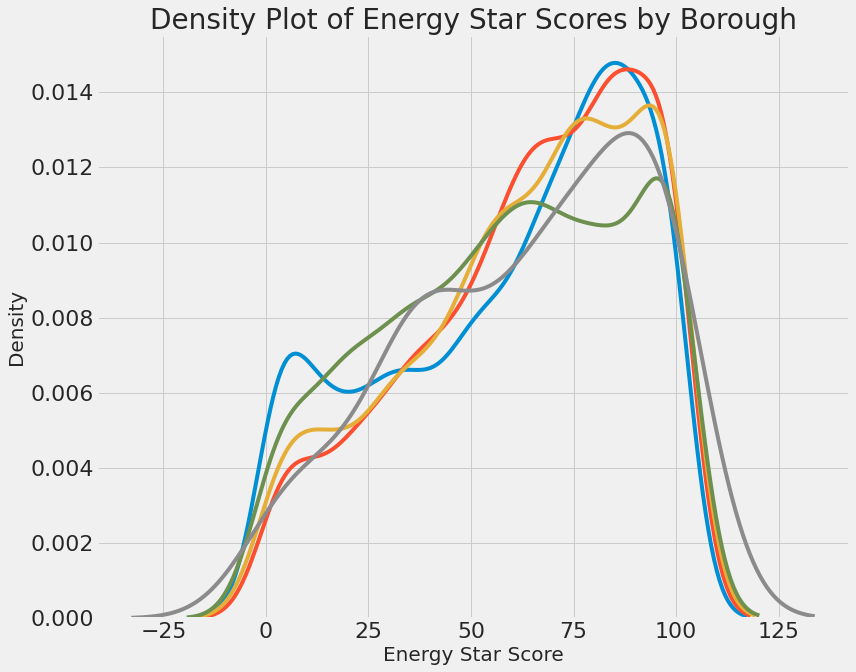

In [ ]:
#14
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

위에서 나타난 바와 같이 borough(빌딩이 위치한 지역)는 score 분포에 영향을 미치지 않는다. 그렇지만 borough에 따른 score 분포의 variance가 크므로 삭제하지 않고 그냥 두도록 한다.

## Correlations between Features and Target

In order to quantify correlations between the features (variables) and the target, we can calculate the [Pearson correlation coefficient](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated. The figure below shows different values of the correlation coeffient and how they appear graphically.

![](images/correlation_examples.png)

Although there can be non-linear relationships between the features and targets and correlation coefficients do not account for interactions between features, linear relationships are a good way to start exploring trends in the data. We can then use these values for selecting the features to employ in our model.

The code below calculates the correlation coefficients between all the variables and the score.

In [ ]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), `Site EUI (kBtu/ft²)` and  `Weather Normalized Site EUI (kBtu/ft²)` (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease. 

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. This is a lot, but with pandas, it is straightforward to do each step!

In [ ]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/li

In [ ]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [ ]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (`Largest Property Use Type_Office`) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is `Site EUI (kBtu/ft^2)`. We can color the graph by the building type to show how that affects the relationship. 

## Two-Variable Plots

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

In [ ]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building. 

### Pairs Plot

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal. 

Using the seaborn `PairGrid` function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables. 

In [ ]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship. 

# Feature Engineering and Selection

탐색적 데이터 분석과정(Exploratory Data Analysis)을 통해 feature engineering과 selection에 도움이 될 수 있는 다음과 같은 사실을 파악하였다:

* 건물 타입('Largest Property Use Type')에 따라 score 분포 차이를 확인할 수 있다. 지역('Borough') 차이에 따른 score 분포 차이는 확인하기 어려우나 분포의 variance가 크므로 두 범주형 데이터도 feature에 포함시키기로 하자.
* 수치형 데이터에 log변환을 적용하여 feature로 추가해보았으나 해당 feature와 타겟값인 score 간의 상관도는 의미있는 증가가 확인되지 않았다.

* __[Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: 가공하지 않은 데이터(raw data)로부터 새로운 feature를 만들어내는 작업. 여러 column의 데이터들을 수학 연산(가중합, log함수, square root 등)을 통해 변환하거나 범주형 데이터의 경우 one-hot encoding등의 encoding을 거치는 과정
* __[Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: 타겟값을 추정하는데 적합한 feature들을 골라내는 과정. 타겟값과 상관도가 높은 feature, 분산이 큰 feature 등을 골라낸다. 타겟값을 추정하는데 별로 도움이 되지 않는 feature는 제거하는 것이 overfitting을 줄이는 등 모델을 학습하는데 도움이 된다. 
[Feature engineering과 selection](https://www.featurelabs.com/blog/secret-to-data-science-success/)은 머신러닝 시스템을 구축하는 과정 중 상당히 중요한 부분이다. 경우에 따라서는 알고리즘을 선택하고 하이퍼파라미터를 최적화하는 것보다 더 큰 효과를 가져올 수도 있다. 제대로 된 데이터를 입력으로 넣지 않고서는 좋은 결과를 얻기를 기대하기 힘들기 때문이다.

In [ ]:
boroughs

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

본 프로젝트에서는 feature engineering을 위해 다음 스텝을 따른다:

* 수치형 데이터와 두 개의 범주형 데이터('Largest Property Use Type', 'Borough')에 대해서만 feature engineering 적용
* 수치형 데이터에 대해서는 log 변환 추가
* 범주형 데이터는 one-hot encoding 적용

For feature selection, we will do the following:

* Remove [collinear features](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)

다음 코드에서는 수치형 데이터를 선택하고, 수치형 데이터의 log변환을 추가하며, 범주형데이터를 one-hot encoding으로 변환한다.

In [ ]:
#15
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
features.shape

(11299, 110)

현재 상황에서 109개의 feature를 가진 11319개의 데이터가 있다. 

## Remove Collinear Features
(collinear: 동일 선상에 있는)
Feature들 중에 일부는 서로 상관관계가 높아 redundant한 것이 있을 수 있는데 이런 것들은 중복된 feature로 볼 수 있으므로 제거되어야 한다. ( ex.) $y\simeq \alpha \times x$ 인 경우 $x$와 $y$가 둘다 feature에 포함될 필요가 없다)

Highly [collinear features](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html) have a significant correlation coefficent between them. 예를 들어, `Site EUI`와 `Weather Norm EUI`는 상관도가 매우 높은데, 이것은 두 가지 측정량이 에너지 사용량을 측정하는 것으로서 약간 다르기만하기 때문이다. 이러한 경우는 둘 중 하나만 feature로 남겨두는 것이 모델의 복잡도를 줄이고 그에 따라 모델 overfitting 위험도 줄일 수 있다.

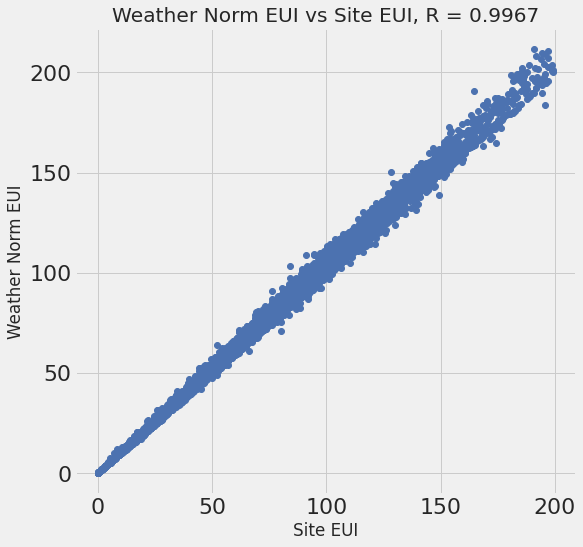

In [ ]:
#16
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [ ]:
np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)

array([[1.        , 0.99674092],
       [0.99674092, 1.        ]])

다음에 정의된 함수는 collinear feature들을 제거하는 기능을 하는 것으로서 두 feature간 상관도(correlation)를 구하고 주어진 threshold보다 높은 상관도를 나타내는 경우 두 feature 중 하나를 제외시킨다.

In [ ]:
#17
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [ ]:
#18
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [ ]:
features.shape

(11299, 66)

In [ ]:
#19
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11299, 65)

이상의 과정을 통해 최종 데이터셋은 64개의 feature를 갖게 된다. 이 중에 one-hot encoding에 의해 늘어난 feature 차원이 많은 부분을 차지하고 있다. Linear regression과 같은 알고리즘에서는 feature의 개수가 많은 것이 문제(overfitting)가 될 수 있지만 random forest 등에서는 내부적으로 feature의 일부만 사용하기 때문에 이러한 문제를 피해갈 수 있다.

## Split Into Training and Testing Sets

본 프로젝트에서는 Energy Star Score가 없는 샘플들은 쓸모가 없으므로 제외시킨다. 전체 70%는 학습데이터, 나머지 30%는 테스트데이터로 사용한다.

In [ ]:
#20
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1855, 65)
(9444, 65)


In [ ]:
#21
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6610, 64)
(2834, 64)
(6610, 1)
(2834, 1)


We have 1858 buildings with no score, 6622 buildings with a score in the training set, and 2839 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat! 

## Baseline 모델과 성능평가지표(metric)

머신러닝 모델의 성능과 비교할 기본적인 baseline 모델을 만든다. 만일 머신러닝 모델이 baseline 모델보다 성능이 낮다면 모델 적용할 때 문제가 있었거나 데이터가 부족하거나 등의 이유각 있을 것이다. 여기서는 $R^2$를 계산할 때와 유사하게 학습데이터에 포함된 타겟값들의 median을 추정값으로 하는 baseline 모델을 채택한다.

성능평가지표로는 MAE(Mean Absolute Error)를 사용한다. MAE는 sklearn에 포함된 함수를 활용할 수도 있으나 아래와 같이 직접 함수를 만들어 사용할 수도 있다.

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5053


# Conclusions

지금까지는 우리는 머신러닝 모델링 과정 중 다음과 같은 처음 세 스텝을 수행하였다:

1. Cleaning and formatting the raw data 
2. Exploratory data analysis
3. Developing a set of features to train our model using feature engineering and feature selection

In [ ]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)